In [1]:
# initializing libraries
import pandas as pd

In [3]:
# laoding 50_stratups.csv file
df = pd.read_csv("50_Startups.csv")
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


# We want to predict profit

## Data profiling and inspection

In [4]:
# checking type of data
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

* 4 numerical data and 1 categorical data

In [7]:
# descritive statistic
df.describe() # numeric data

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


* Maximum R&D Spend is 165349 and minimum is 0 
* As seen adminstration mean is 121344 with maximum value 182645 and minimum 51283
* Maximum Marketing spend is 471784
* Maximum profit is 192261

In [8]:
df.describe(include="object") # categorical data

,State
count,50
unique,3
top,New York
freq,17


* New York state is more repeated state with requency 17 times

In [9]:
# checking the shape of dataframe
df.shape

(50, 5)

In [10]:
# overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


* total number of columns is 5
* total number of rows is 50
* all columns has 50 non-null data that means there is no missing data in this data

## Exploratory Data Analysis(EDA)

<Axes: xlabel='Profit', ylabel='Count'>

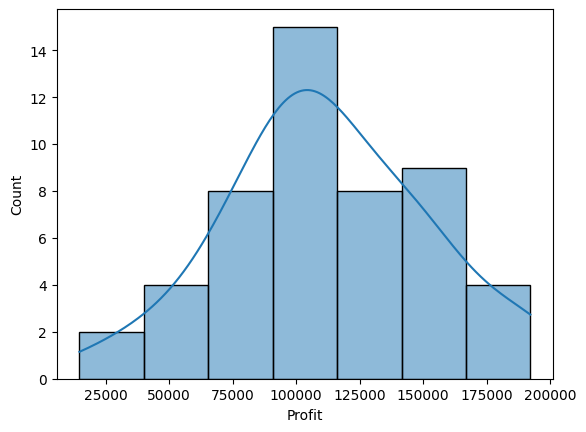

In [12]:
# distribution of profit
import seaborn as sns
sns.histplot(x="Profit", data=df, kde=True)

* it seem normally distributed

<Axes: xlabel='R&D Spend', ylabel='Count'>

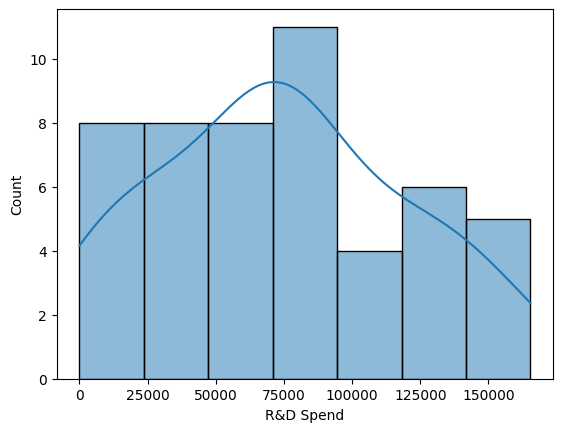

In [13]:
# distribution of R&D spend
sns.histplot(x='R&D Spend', kde=True, data=df)

<Axes: xlabel='Administration', ylabel='Count'>

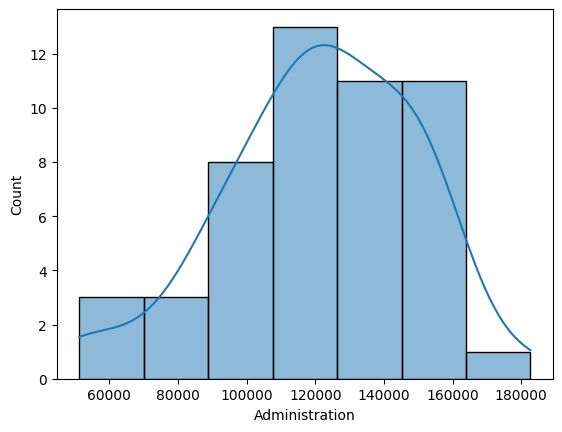

In [15]:
# distribution of administration
sns.histplot(x='Administration', kde=True, data=df)

<Axes: xlabel='Marketing Spend', ylabel='Count'>

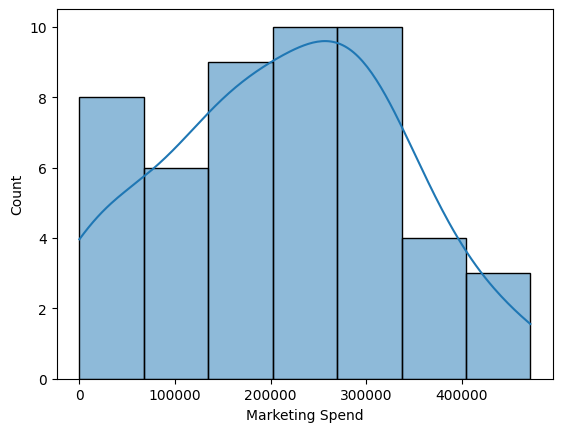

In [16]:
# distribution of Marketing Spend
sns.histplot(x='Marketing Spend', kde=True, data=df)

<Axes: xlabel='State', ylabel='count'>

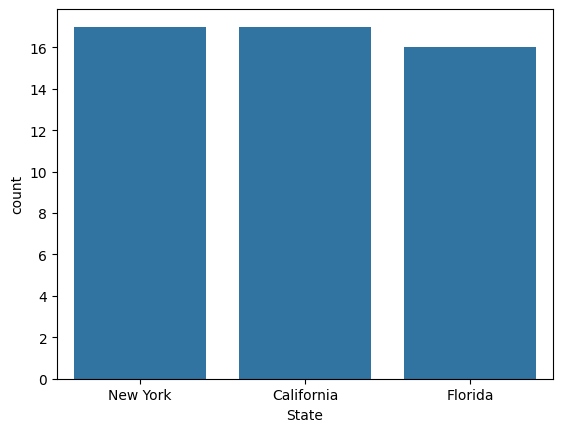

In [17]:
# distribution of state
sns.countplot(x="State",data=df)

<Axes: xlabel='Profit', ylabel='count'>

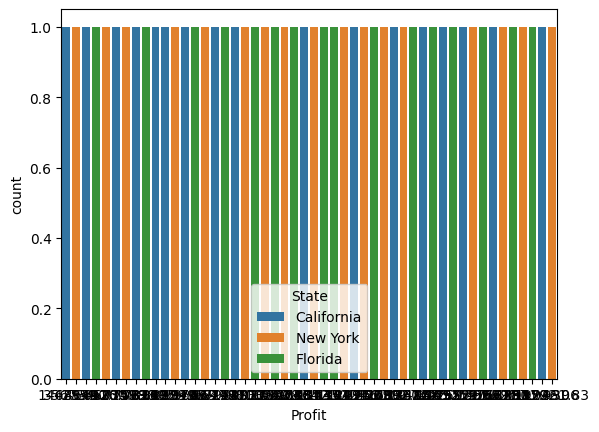

In [20]:
# distribution of state and profit
sns.countplot(x="Profit", hue="State", data=df)

<Axes: ylabel='Profit'>

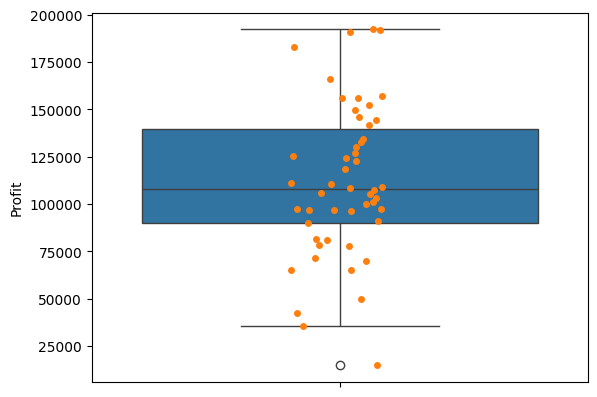

In [23]:
sns.boxplot(df.Profit)
sns.stripplot(df.Profit)

* here, outlier are there in profit

In [38]:
## finding outlier using z_score
threshold = 3
mean = df.Profit.mean()
std = df.Profit.std()

In [40]:
outlier = []
for i in df.Profit:
    z_score = (i + mean)/ std
    if z_score > threshold:
        outlier.append(i)
print(f"Oultier are {outlier}")

Oultier are [192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12, 156122.51, 155752.6, 152211.77, 149759.96, 146121.95, 144259.4, 141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37, 124266.9, 122776.86, 118474.03, 111313.02, 110352.25, 108733.99, 108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64, 99937.59, 97483.56, 97427.84, 96778.92, 96712.8, 96479.51, 90708.19, 89949.14, 81229.06, 81005.76, 78239.91, 77798.83, 71498.49, 69758.98, 65200.33, 64926.08, 49490.75, 42559.73, 35673.41, 14681.4]


* it display all data are outlier so we try next approach

In [43]:
# using iqr
import numpy as np
q1, q3 = np.percentile(df.Profit, [25, 75])

In [45]:
l_fence = q1 - 1.5 *(q3 - q1)
u_fence = q3 + 1.5 *(q3 - q1)

In [46]:
outlier=[]
for x in df.Profit:
    if x > u_fence or x < l_fence: 
        outlier.append(x)
print(f"Oultier are {outlier}")

Oultier are [14681.4]


* here 14681.4 is the outlier in the profit column

## Feature selection using the idea of correaltion.

In [47]:
df.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

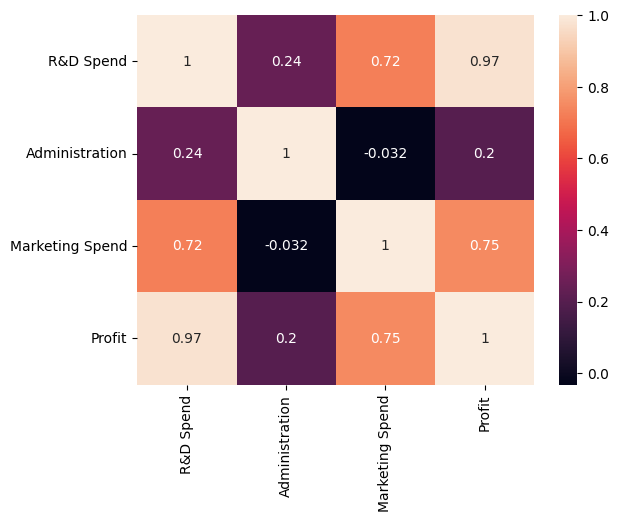

In [49]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

* Profit and R&D Spend is correlated positively with correlation 0.97
* Profit and Marketing Spend also correlated positively with correlation 0.75


In [53]:
X = df.loc[: , ["R&D Spend","Marketing Spend"]]
y = df.Profit

## Train_test_split

In [55]:
# splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

## Modeling

In [63]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"R2 score of linearRegression is {round(r2,3)}")

R2 score of linearRegression is 0.936


In [64]:
# Lasso
l_model = Lasso()
l_model.fit(X_train, y_train)
y_pred = l_model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"R2 score of LassoRegression is {round(r2,3)}")

R2 score of LassoRegression is 0.936


In [65]:
# elasticNet
e_model = ElasticNet()
e_model.fit(X_train, y_train)
y_pred = e_model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"R2 score of ElasticNetRegression is {round(r2,3)}")

R2 score of ElasticNetRegression is 0.936


In [66]:
# Ridge
r_model = Ridge()
r_model.fit(X_train, y_train)
y_pred = r_model.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=y_pred)
print(f"R2 score of RidgeRegression is {round(r2,3)}")

R2 score of RidgeRegression is 0.936


* all regression r2 score is same so we can use any model in this data

In [73]:
y_pred = lr_model.predict([[24,25]])

C:\Users\Thinkpad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [74]:
y_pred

array([48363.00131418])

## Serialization

In [78]:
import pickle
with open("mulmodel.pickle","bw") as file:
    pickle.dump(lr_model,file)

## Deserialization

In [79]:
with open("mulmodel.pickle","br") as file:
    model = pickle.load(file)

In [82]:
model.predict([[24,25]])

C:\Users\Thinkpad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([48363.00131418])

In [83]:
model.coef_

array([0.78453599, 0.02712423])

In [85]:
model.intercept_

48343.494344655715